# Decision Tree: Customer Churn

Customer churn is the loss of clients or customers. Companies often use customer churn analysis and use customer churn rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

You are asked to apply decision tree model to make predictions on customer churn for a telecommunication company.

#### Data Dictionary


The data set includes information about:

**Churn**: If customers  left within the last month or not

• Services that each customer has signed up for, including **phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies**

• Customer account information, including **tenure (how long they’ve been a customer), contract, payment method, paperless billing, monthly charges, and total charges**

• Demographic information about customers, including **gender, age range, and if they have partners and dependents**




## Homework Assignment Instructions:

1.review in-class software lab files (Sofware lab #2 for homework assignment 1, #5 and #6 for homework assigment 2)

2.follow the steps list in this python file

3.perform analysis

4.answer the questions in **Homework Assignment 1/Homework Assignment 2 on Canvas** based on your analysis

5.**save this file (with all your syntax)**. You will continue working on the same dataset for Homework assignment 2. You may also need it for your team project.


# Homework Assignment 1

## Step 1: Data Preprocessing & Cleaning

#### 1. First read the churn dataset into the IDE.





In [2]:
# write your code in this cell#
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
# write your code in this cell#
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()
# Display the first few rows of the dataset
df.head()


Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2. Check the number of columns and rows, and the missing values in churn dataset.



In [3]:
# write your code in this cell#
# Check the number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Number of rows: 7032
Number of columns: 20
Missing values in each column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### 3. Check the target variable, how many observations/records/instances are in each level of the target variable?



In [4]:
# write your code in this cell#
# Check the count of each level in the target variable 'Churn'
churn_counts = df['Churn'].value_counts()
print("Counts of each level in Churn:")
print(churn_counts)


Counts of each level in Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


#### 4. Get predictors and target variables ready to create training set and test set






In [5]:
# write your code in this cell#
# Select predictors (all columns except 'Churn') and target variable
X = df.drop(columns=['Churn'])  # Predictors
y = df['Churn']  # Target Variable

# Display the first few rows of predictors and target
print("Predictors (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Predictors (X):
   gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            no     Yes         No       1           No   
1    Male            no      No         No      34          Yes   
2    Male            no      No         No       2          Yes   
3    Male            no      No         No      45           No   
4  Female            no      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes    

#### 5. Then, we use 20% of the data as the test set and the rest as the training set.

***!!!!Important!!!***

Please make sure set **random_state = 0** throughout this homework assignment, otherwise you may have different results and may not find the answers.



In [6]:
# write your code in this cell#
# Import necessary library for train-test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the training and test sets
print("Training Set:")
print(X_train.shape, y_train.shape)

print("\nTest Set:")
print(X_test.shape, y_test.shape)


Training Set:
(5625, 19) (5625,)

Test Set:
(1407, 19) (1407,)


## Step 2: Create a Decision Tree Model

#### 1.  We first  build a  fully developed decision tree model on the training set, use entropy as the criterion (i.e., growing the tree until all leaves are pure).


In [7]:
# write your code in this cell#
# Step 1: Encode Categorical Variables before Train-Test Split
X_encoded = pd.get_dummies(X, drop_first=True)

# Convert boolean columns to integers (0 and 1)
X_encoded = X_encoded.astype(int)

# Step 2: Split the Data into Training and Test Sets
from sklearn.model_selection import train_test_split

# Split the encoded data into training and test sets (20% test, 80% train)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Display the shapes of the training and test sets
print("Training Set:")
print(X_train.shape, y_train.shape)

print("\nTest Set:")
print(X_test.shape, y_test.shape)

# Step 3: Build Decision Tree Model using Entropy
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model using Entropy
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train the model on the training set
decision_tree.fit(X_train, y_train)

print("Decision Tree Model Created and Trained.")





Training Set:
(5625, 30) (5625,)

Test Set:
(1407, 30) (1407,)
Decision Tree Model Created and Trained.


#### 2. check the model accuracy on the training set.




In [8]:
# write your code in this cell#
from sklearn.metrics import accuracy_score

# Make predictions on the training set
y_train_pred = decision_tree.predict(X_train)

# Calculate and print accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Set Accuracy: {train_accuracy:.4f}")



Training Set Accuracy: 0.9913


#### 3. Then, we need to evaluate decision tree model on test set using accuracy score as well.



In [9]:
# write your code in this cell#
# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.7221


## Step 3: Prune a tree

#### 1. In this step you try to control the size of the decision tree we just create by setting several parameters. This time we just use **max_depth = 4** to do a simple pruning. Remember set **random_state = 0** to be consistent.





In [10]:
# write your code in this cell#
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a pruned Decision Tree model with max_depth = 4
pruned_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

# Fit the model to the training set
pruned_tree.fit(X_train, y_train)

print("Pruned Decision Tree Model Created and Trained.")


Pruned Decision Tree Model Created and Trained.


#### 2. Then  we fit the model to the training set and evaluate it on the test. We need to get model accuracy of this pruned decision tree on both training set and test set.



In [11]:

# write your code in this cell#
# Make predictions on the training set
y_train_pred_pruned = pruned_tree.predict(X_train)

# Calculate accuracy on the training set
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
print(f"Pruned Training Set Accuracy: {train_accuracy_pruned:.4f}")

# Make predictions on the test set
y_test_pred_pruned = pruned_tree.predict(X_test)

# Calculate accuracy on the test set
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)
print(f"Pruned Test Set Accuracy: {test_accuracy_pruned:.4f}")


Pruned Training Set Accuracy: 0.7915
Pruned Test Set Accuracy: 0.7889


## Step 4: Visualizing and analyzing the tree

#### 1. In this step we try to interpret and visualize the pruned decision tree. We are interested in the important variables that impact customers' churn behaviors.

Please create a dataframe to show the importance of each variable. The importance measure is saved in **.feature _ importances _ ** attribute.






In [12]:
# write your code in this cell#
import pandas as pd
import numpy as np

# Get feature importances
feature_importances = pruned_tree.feature_importances_

# Create a DataFrame to show feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importance
print("Feature Importance:")
print(importance_df)


Feature Importance:
                                  Feature  Importance
0                       Contract_Two year    0.397867
1                       Contract_One year    0.244722
2             InternetService_Fiber optic    0.126678
3                            TotalCharges    0.094441
4                                  tenure    0.059281
5                     StreamingMovies_Yes    0.038396
6                          MonthlyCharges    0.025704
7          PaymentMethod_Electronic check    0.012912
8          MultipleLines_No phone service    0.000000
9                        PhoneService_Yes    0.000000
10                            Partner_Yes    0.000000
11                         Dependents_Yes    0.000000
12                      SeniorCitizen_yes    0.000000
13                            gender_Male    0.000000
14                     OnlineSecurity_Yes    0.000000
15     OnlineSecurity_No internet service    0.000000
16                     InternetService_No    0.000000
17      

2. Lastly let's  visualize the tree. You need to import matplotlib as well.




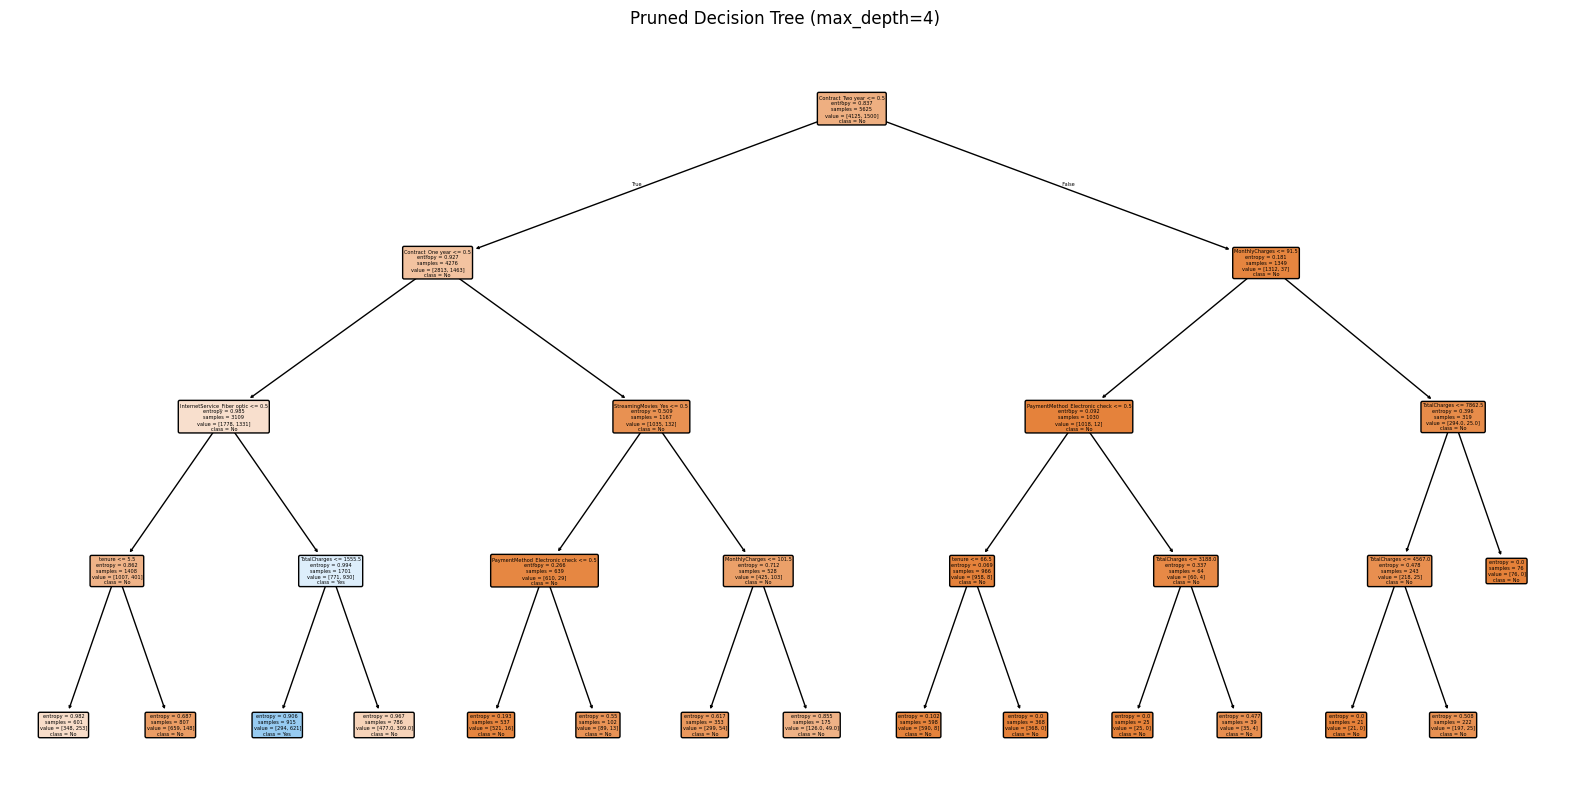

In [13]:
# write your code in this cell#
import matplotlib.pyplot as plt
from sklearn import tree

# Plot the pruned decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(pruned_tree,
               feature_names=X_train.columns,
               class_names=['No', 'Yes'],
               filled=True,
               rounded=True)
plt.title("Pruned Decision Tree (max_depth=4)")
plt.show()


# --------------------  Homework Assignment 1 Stops Here------------------------

# Homework Assignment 2


#### In Homework Assignment 2, you will apply more methods (confusion matrix, ROC, etc) to evaluate the performance of decision tree model that you have created in Homework Assignment 1, and improve this decision tree model performance using ensemble methods.

## Step 5: Model Evaluation using Confusion Matrix and ROC Curve

#### 1. create and visualize confusion matrix for the original decision tree model (without pruning) on the test set, interpret the True Positives, True Negatives, False Positives and False Negatives. Answer questions in Homework Assignment 2 on Canvas.




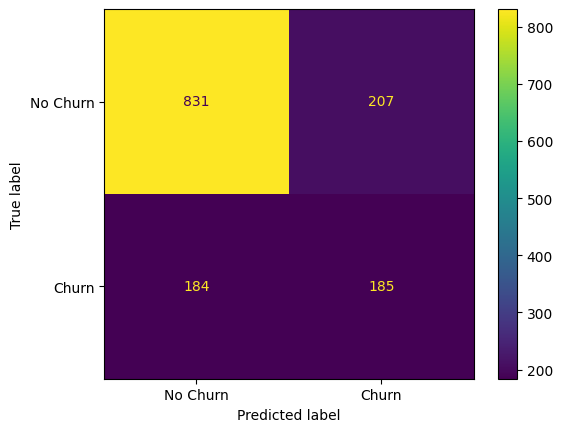

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()


#### 2. Create a ROC curve to further evaluate the model performance




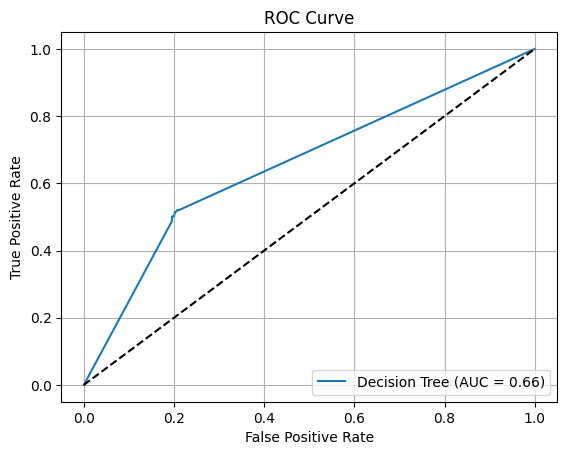

In [17]:
# write your code in this cell#
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Encode string labels in y_test
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  # 'No' -> 0, 'Yes' -> 1

# Get predicted probabilities from the original tree model
y_proba = decision_tree.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_encoded, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Step 5: Model Improvement: Ensemble Methods

In this step you will perform serveral emsemble methods and improve the model performance.

### Emsemble Method 1: Bagging

In this step you need to create a bagging model using **BaggingClassifier** (with **max_depth =4**, **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.






✅ Bagging Accuracy: 0.7953
✅ Bagging AUC: 0.8246


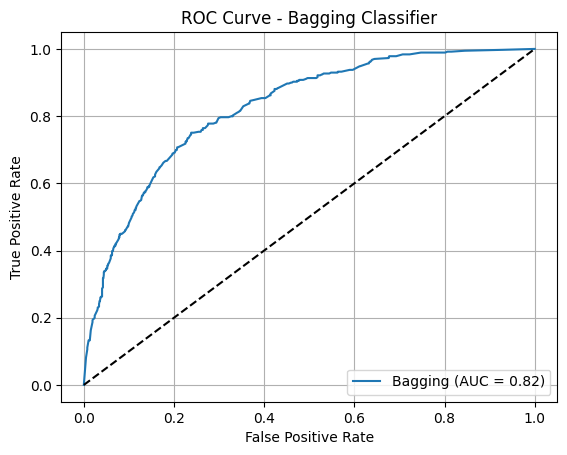

In [19]:
# write your code in this cell#
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create base estimator
base_tree = DecisionTreeClassifier(max_depth=4)

# Use 'estimator' instead of 'base_estimator'
bag_model = BaggingClassifier(estimator=base_tree, random_state=0)
bag_model.fit(X_train, y_train)

# Predict on test set
bag_pred = bag_model.predict(X_test)
bag_proba = bag_model.predict_proba(X_test)[:, 1]

# Encode y_test if needed
from sklearn.preprocessing import LabelEncoder
if y_test.dtype == object:
    y_test_encoded = LabelEncoder().fit_transform(y_test)
else:
    y_test_encoded = y_test

# Evaluate
bag_accuracy = accuracy_score(y_test, bag_pred)
fpr, tpr, _ = roc_curve(y_test_encoded, bag_proba)
bag_auc = auc(fpr, tpr)

print("✅ Bagging Accuracy:", round(bag_accuracy, 4))
print("✅ Bagging AUC:", round(bag_auc, 4))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label=f'Bagging (AUC = {bag_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging Classifier")
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Emsemble Method 2: Boosting

Create a boosting model using **AdaBoostClassifier()** (with  **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.

✅ Boosting Accuracy: 0.8003
✅ Boosting AUC: 0.8407


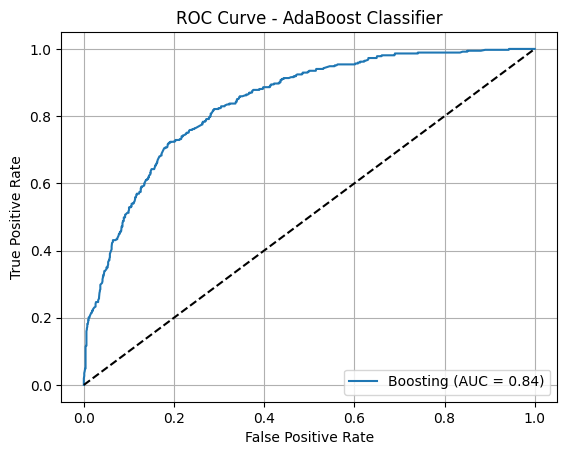

In [20]:
# write your code in this cell#
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the AdaBoost model
boost_model = AdaBoostClassifier(random_state=0)
boost_model.fit(X_train, y_train)

# Predict on test set
boost_pred = boost_model.predict(X_test)
boost_proba = boost_model.predict_proba(X_test)[:, 1]

# Encode y_test if needed
from sklearn.preprocessing import LabelEncoder
if y_test.dtype == object:
    y_test_encoded = LabelEncoder().fit_transform(y_test)
else:
    y_test_encoded = y_test

# Evaluate
boost_accuracy = accuracy_score(y_test, boost_pred)
fpr, tpr, _ = roc_curve(y_test_encoded, boost_proba)
boost_auc = auc(fpr, tpr)

print("✅ Boosting Accuracy:", round(boost_accuracy, 4))
print("✅ Boosting AUC:", round(boost_auc, 4))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label=f'Boosting (AUC = {boost_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost Classifier")
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Emsemble Method 3: Random Forest

Create a random forest model using **RandomForestClassifier** (with **max_depth = 4**, **random_state= 0**), and apply it on the test using **.predict** method, and evaluate it using accuracy and AUC.






✅ Random Forest Accuracy: 0.791
✅ Random Forest AUC: 0.8367


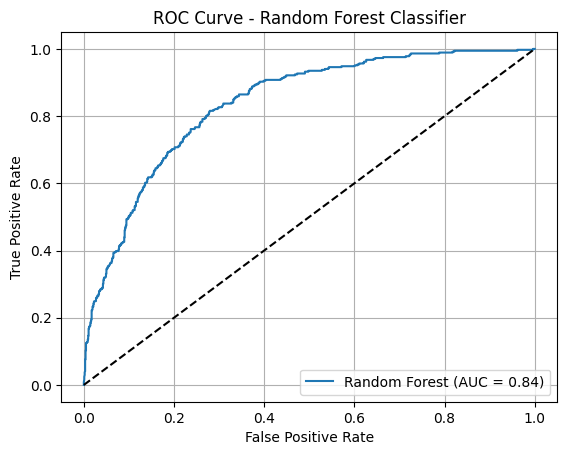

In [21]:
# write your code in this cell#
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(max_depth=4, random_state=0)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Encode y_test if needed
from sklearn.preprocessing import LabelEncoder
if y_test.dtype == object:
    y_test_encoded = LabelEncoder().fit_transform(y_test)
else:
    y_test_encoded = y_test

# Evaluate
rf_accuracy = accuracy_score(y_test, rf_pred)
fpr, tpr, _ = roc_curve(y_test_encoded, rf_proba)
rf_auc = auc(fpr, tpr)

print("✅ Random Forest Accuracy:", round(rf_accuracy, 4))
print("✅ Random Forest AUC:", round(rf_auc, 4))

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc='lower right')
plt.grid()
plt.show()


3. We are interested in the feature importance based on the random forest model. which feature is the most important one in predicting the target variable?





Most important feature in predicting churn: tenure


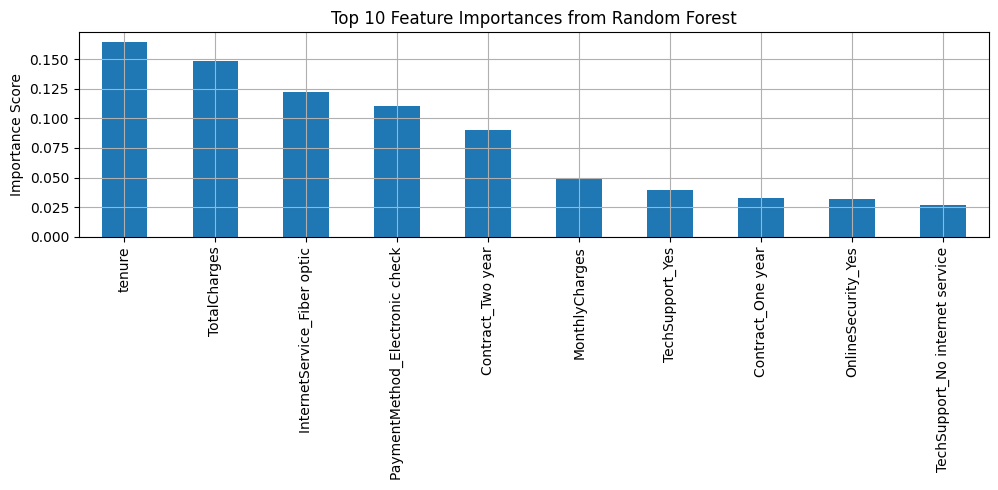

In [22]:
# write your code in this cell#
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
features = X_train.columns

# Create a sorted Series
importance_series = pd.Series(importances, index=features).sort_values(ascending=False)

# Print the most important feature
print("Most important feature in predicting churn:", importance_series.idxmax())

# Plot top features
plt.figure(figsize=(10, 5))
importance_series.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances from Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid()
plt.show()


# Step 5: Grid Search

In this step we will improve the model’s performance by tuning its parameters.

#### 1. Apply a hyperparameter tuning model using GridSearch algorithm on the training set and evaluate the model using the test set. What is the model performance??

To answer this question, use **GridSearchCV()** (set **random_state =0**)to tune the parameters in the decision tree model.The parameters we will tuned include: **criterion (entropy, Gini)**, **max_leaf_nodes (ranges from 2 to 50)**, **max_depth(ranges from 3 to 15)**. In addition we perform 10 cross validation as well.





In [23]:
# write your code in this cell#
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': list(range(2, 51)),
    'max_depth': list(range(3, 16))
}

# Set up the base model
dt = DecisionTreeClassifier(random_state=0)

# Grid Search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)


✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 39}


#### 2. The gridsearch returns us a combination of parameters that yields the best model performance. What is the value of max_depth of the best model returned by hyperparameter tuning?




In [24]:
# write your code in this cell#
print("Best max_depth from GridSearch:", best_model.get_params()['max_depth'])


Best max_depth from GridSearch: 8


#### 3. Then we apply this model on the test set and get the accuracy.



In [26]:
# write your code in this cell#
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode y_test if needed
if y_test.dtype == object:
    le = LabelEncoder()
    y_test_encoded = le.fit_transform(y_test)
    best_pred_encoded = le.transform(best_pred)  # Fix the prediction mismatch
else:
    y_test_encoded = y_test
    best_pred_encoded = best_pred

# Calculate and print accuracy
test_accuracy = accuracy_score(y_test_encoded, best_pred_encoded)
print("✅ Test Set Accuracy of Best Model:", round(test_accuracy, 4))



✅ Test Set Accuracy of Best Model: 0.7811


#### 4. Lastly we visualize ROC curve and estimate the AUC value.

✅ AUC of Best Model: 0.8253


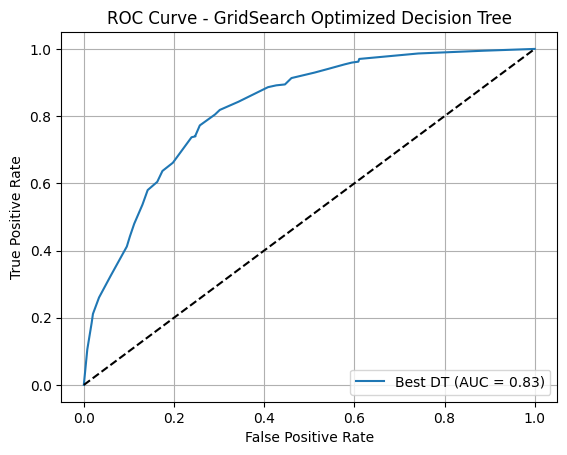

In [27]:
# write your code in this cell#
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from the best model
best_proba = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC — using already encoded y_test
fpr, tpr, _ = roc_curve(y_test_encoded, best_proba)
roc_auc = auc(fpr, tpr)

# Print AUC
print("✅ AUC of Best Model:", round(roc_auc, 4))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Best DT (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GridSearch Optimized Decision Tree")
plt.legend(loc='lower right')
plt.grid()
plt.show()


 ## --------------------Homework Assignment 2 Stops Here----------------------